In [21]:
from collections import deque
from functools import lru_cache
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def min_days(n: int) -> int:
    if n <= 0:
        return 0
    
    @lru_cache(None)
    def dp(m):
        if m < 3:
            return m
        return 1 + min(
            (m & 1) + dp(m >> 1),
            (m % 3) + dp(m // 3),
        )

    return dp(n)

In [17]:
def n_sub_problems(n: int) -> int:
    """ function for counting number of subproblems
    """
    if n <= 0:
        return 0
    
    q = deque([n])
    count = 0
    already_called = set()
    while len(q):
        el = q.popleft() # popping the queue
        count += 1
        if el not in already_called:
            already_called.add(el)
            if el >= 3: # if element is greater than 3, then add el // 2 and el // 3 to the queue
                q.append(el >> 1)
                q.append(el // 3)
    return count

In [27]:
ns = np.arange(1, 10_000, 100)

log2_ns = np.log2(ns) # calculating log2(n)
log2_ns_square = log2_ns ** 2 # calculating log2(n) squared

log10_ns = np.log10(ns) # calculating log10(n)
log10_ns_square = log10_ns ** 2 # calculating log10(n) squared

number_of_subprobs = np.array([n_sub_problems(n) for n in ns]) # counting # of subproblems

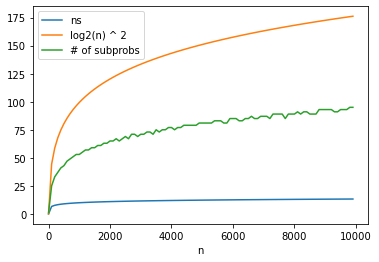

In [33]:
# plotting against log2(n) and log2(n) ^ 2

sns.lineplot(ns, log2_ns)
sns.lineplot(ns, log2_ns_square)
sns.lineplot(ns, number_of_subprobs)

plt.xlabel("n")
plt.legend([
    "ns", "log2(n) ^ 2",
    "# of subprobs"
])

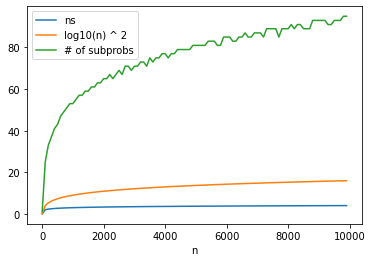

In [34]:
# plotting against log10(n) and log10(n) ^ 2

sns.lineplot(ns, log10_ns)
sns.lineplot(ns, log10_ns_square)
sns.lineplot(ns, number_of_subprobs)

plt.xlabel("n")
plt.legend([
    "ns", "log10(n) ^ 2",
    "# of subprobs"
])

In [35]:
# so we can argue that the time complexity is O(log(n)) ^ 2